<div id="Titre"></div>

# TP1 - Echelle de teinte

Vous pouvez modifier chaque cellule en cliquant dessus (même les cellules texte). Cliquez sur "Exécuter" pour revenir à l'affichage classique ou avoir un retour des programmes pythons.

<h3>Matériel :</h3>
<ul><li>Arduino nano</li>
    <li>Breadboard</li>
    <li>Fils</li>
    <li>Photoresistance</li>
    <li>Resistance $1 k\Omega$</li>
    <li>laser rouge</li>
    <li>4 cuves de spectroscopie notées "4", "3", "2" et "1" contenant des solutions aqueuses de sulfate de cuivre de concentration 0,05 mol/L, 0,10 mol/L, 0,20 mol/L et 0,40 mol/L respectivement</li>
    <li>1 cuve de spectroscopie notée "Blanc" contenant uniquement le solvant (eau)</li>
    <li>1 cuve de spectroscopie notée "X" contenant une solution de sulfate de cuivre de concentration 0,175 mol/L</li>
    <li>Ordinateur</li></ul>
    <br>
<h3>Logiciels :</h3>
<ul><li>Winpython ou autre IDE python</li>
<li>Navigateur web type Mozilla firefox</li>
    <li>IDE Arduino</li></ul>
    <br>

In [1]:
# imports à exécuter une fois au début
from math import log
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

# Sujet
On dispose de 4 solutions aqueuses de sulfate de cuivre $Cu_{(aq)}^{2+} + SO_{4 (aq)}^{2-}$
<br>
Leur concentration massique est donnée dans le tableau suivant :


| Identifiant | Concentration (g/L) |
|-------------|---------------------|
| Blanc       |                0    |
| 1           |                64   |
| 2           |                32   |
| 3           |                16   |
| 4           |                8    | 

On dispose aussi d'une <b>cuve "X"</b> contenant une solution aqueuse de sulfate de cuivre de concentration massique inconnue.


Si on veut déterminer la valeur de la concentration de x, il faut réaliser une mesure quantitative de cette couleur. Nous allons donc utiliser un composant dont la résistance varie en fonction de la lumière qu’il reçoit : <b>la photorésistance.</b>
Pour déterminer la valeur de la résistance <b>$\boldsymbol{R_{1}}$</b> de la photorésistance, on utilise une carte Arduino et une résistance de valeur connue <b>$\boldsymbol{R_{2} = 1000\ \Omega}$</b>. On réalise le montage de la <b>figure 1</b> sans brancher la carte à l’ordinateur dans un premier temps.
<p><center><b>Figure 1. Montage à Réaliser</b>
<img src="TP1_figure1.png"></center>
Il est équivalent au montage ci-dessous :
<center><b>Figure 2. Schéma électrique équivalent</b>
<img src="TP1_figure2.png"></center></p>

On a $\boldsymbol{U_0\ =\ U_1\ +\ U_2}$ d'après la loi des mailles.
<p>De plus, $\boldsymbol{I_1\ =\ \frac{U_1}{R_1}\ =\ I_2\ =\ \frac{U_2}{R_2}\ =\ I}$. 

Le montage réalisé sur la carte Arduino nous permet de mesurer U2. On connaît U0 et R2. Ce qui nous intéresse ici est la valeur de R1.
<p>On a $\boldsymbol{R_1\ =\ \frac{U_1\ \times\ R_2}{U_2}}$ et comme $\boldsymbol{U_1\ =\ U_0\ -\ U_2}$ cela donne:</p>
<p>$\boldsymbol{R_1\ =\ \frac{(U_0\ -\ U_2)\times\ R_2}{U_2}\ =\ \frac{R_2\ \times\ U_0}{U_2}\ -\ R_2}$</p>

U<sub>2</sub> est mesuré par le convertisseur analogique numérique de la carte Arduino qui numérise une tension entre 0 et 5V sur 10 bits. Ainsi, elle nous renvoie une valeur entière entre 0 et 2<sup>10</sup> - 1; 0 pour une tension de 0V et 1023 pour une tension de 5V.
Ainsi, lorsque <b>la carte Arduino renvoie 534</b> il s'agit de la mesure d'une tension $U\ =\ \frac{534.\ \times\ 5.}{1023.}\ =\ 2.61\ V$</p>

<p>Si on note <b>n</b> la valeur entière renvoyée par la carte Arduino, on peut exprimer la valeur de la tension $\boldsymbol{U_2\ =\ n\ \times\ 0.00489}$. </p>
<b>C'est valable pour toute mesure analogique (ports A0 à A7)</b>

<p>D'où $\boldsymbol{R_1\ =\ \frac{R_2\ \times\ 5.}{n\ \times\ 0.00489}\ -\ R_2}$</p>

Le programme Arduino <a href="./photoresistance_cor.ino" target="_blank">photoresistance_cor.ino</a> fourni permet à la carte de renvoyer la valeur de la résistance <b>R<sub>1</sub></b> environ <b>deux fois par seconde.</b>

<p>Un fois le montage de la <b>figure 1.</b> réalisé, téléversez ce programme vers la carte Arduino. Attention de bien régler le <b style="color:red;">type de carte, le port et le processeur</b>.</p>
<p>Nous allons maintenant réaliser des mesures de l'intensité de la lumière qui traverse un échantillon de solution. Pour cela, placer le laser rouge en face de la photorésistance comme sur la <b>figure 3.</b> Ouvrir alors le <b>moniteur série</b> du logiciel Arduino. Réglez le débit binaire à la même valeur que dans votre programme (115200 ici). Vous pouvez alors lire la valeur de la résistance R<sub>1</sub> de la photorésistance.
<p><center><b>Figure 3. Montage expérimental</b>
<img src="TP1_figure3.jpg"></center></p>

Positionnez les différentes cuves (blanc, 1, 2, 3, 4 et X) entre le laser et la photorésistance. Notez les valeurs obtenues <b style="color:red;">dans des listes python ci-dessous</b> puis cliquez sur exécuter une fois terminé.

In [3]:
#Rentrez vos valeurs ici sous forme d'une liste python puis exécutez la cellule.

R1 = [] #rentrer ici les valeurs de resistance dans l'ordre blanc, 4, 3, 2, 1 (celui de C)
C = [0.,8.,16.,32.,64.] #et ici les concentrations correspondantes.
Rx = 0 #rentrer ici la valeur de la résistance de la solution inconnue

<b style="color:red;">Le programme python</b> ci-dessous permet de tracer le graphique représentant $\boldsymbol{R_1}$ <b>en fonction de la concentration</b> pour les solutions "blanc", 1, 2, 3, 4 sous la forme de croix. Il affiche également un titre, et des informations sur les deux axes.
<p>Vous pourrez utiliser <a href="./methode_courbe.ipynb" target="_blank">la fiche méthode_courbe fournie</a> pour le compléter ou modifier ce code pour voir l'intérêt de chaque ligne.</p>

<IPython.core.display.Javascript object>


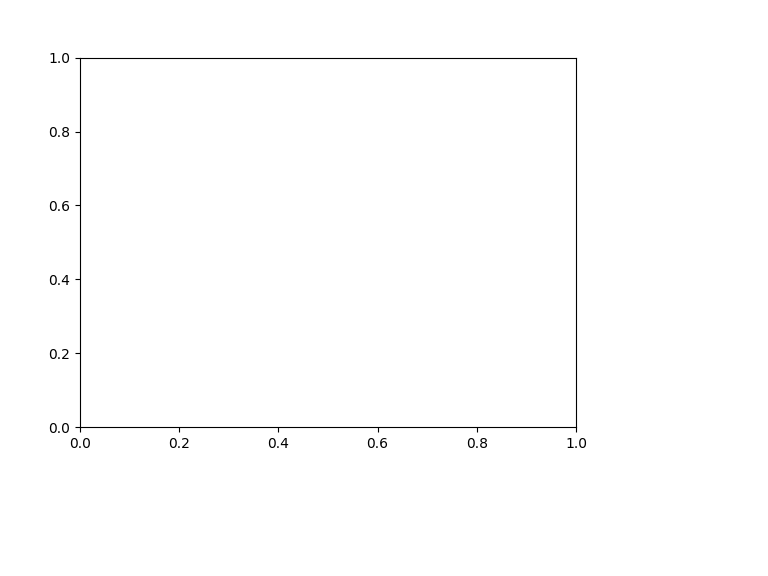

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

In [4]:
#Exécutez cette cellule pour recalculer la courbe et l'affichage. 
#Il faudra le faire à chaque fois que vous changez les valeurs de la liste R1.

#Graphique
plt.figure("Figure 4.")
plt.plot(C,R1,"+")

plt.title("Valeur de la photorésistance R1 en fonction de la concentration C")
plt.xlabel("Concentration C (g/L)")
plt.ylabel("Résistance R1 (ohm)")

plt.show()

Voici ci-dessous <b style="color:red;">un programme python</b> permettant de construire la liste des $\boldsymbol{log(R_1)}$ pour les différentes valeurs de $R_1$. On peut utiliser directement la fonction log car elle a déjà été importée au début de la feuille.

In [ ]:
#Exécutez cette cellule pour recalculer la liste logR1.
#Il faudra le faire à chaque fois que vous changez les valeurs de la liste R1.

logR1 = []
for val in R1:
    logR1.append(log(val))

Pour tracer le graphique représentant $\boldsymbol{log(R_1)}$ <b>en fonction de la concentration</b> pour les solutions "blanc", 1, 2, 3, 4 sous la forme de croix, voici le programme nécessaire:

In [ ]:
#Exécutez cette cellule pour recalculer la courbe et l'affichage. 
#Il faudra le faire à chaque fois que vous changez les valeurs de la liste R1.

plt.figure("Figure 5.")  
plt.plot(C,logR1,"+")

plt.title("log(R1) en fonction de la concentration C")
plt.xlabel("Concentration C (g/L)")
plt.ylabel("log(R1)")

plt.show()

On peut s'affranchir de la quantité de lumière absorbée par l'eau et la cuve en plastique en traçant $\boldsymbol{log(R_1)\ -\ log(R_1blanc)}$<b> en fonction de la concentration massique.</b>
Il faut donc écrire <b style="color:red;">un programme python</b> permettant de construire la liste <b>logR1moinslogR0</b> regroupant ces valeurs.</p>

In [ ]:
#Exécutez cette cellule pour recalculer la liste logR1moinslogR0 (logR1 dont on retire la valeur du blanc).
#Il faudra le faire à chaque fois que vous changez les valeurs de la liste R1.



#Construction de la liste calculée à partir des valeurs expérimentales
R0 = R1[0] #valeur du blanc

logR1moinslogR0 = []
for i in range(len(R1)):
    logR1moinslogR0.append(log(R1[i]) - log(R0))

Voici maintenant <b style="color:red;">un programme python</b> permettant de <b>modéliser</b> cette série de données par une <b>fonction linéaire</b>. Le programme suivant sert à afficher sur un même <b>graphique</b> les points expérimentaux, le modèle et l'équation du modèle.</p>
<p>Vous pourrez utiliser <a href="./methode_modele.ipynb" target="_blank">la fiche méthode_modele fournie</a> pour modifier ce code et faire des essais.</p>

In [ ]:
#Exécutez cette cellule pour recalculer le modèle. 
#Il faudra le faire à chaque fois que vous changez les valeurs de la liste R1.



#Ecrire la fonction du modèle (x est la variable et a un parametre à optimiser -il peut y en avoir plusieurs-)
def lineaire(x,a):
    return a*x    

#Optimiser les valeurs des paramètres
params,covariance = curve_fit(lineaire,C,logR1moinslogR0)

#Construire la liste de valeurs pour le modèle (on peut changer xmax et xmin pour changer les limites du modèle)
xmax = 70.
xmin = 0.
modelex=[]
modeley=[]
for i in range(100):
    modelex.append(xmin + i * (xmax - xmin) / 99.)
    modeley.append(lineaire(modelex[i], *params))

In [ ]:
#Exécutez cette cellule pour recalculer la courbe et l'affichage. 
#Il faudra le faire à chaque fois que vous changez les valeurs de la liste R1.


plt.figure("Figure 6.")

#Tracé des points expérimentaux avec quelques paramètres facultatifs
plt.plot(C,logR1moinslogR0,"+",markersize=10.,markeredgewidth=3.,label="points expérimentaux")
   
#Tracé du modèle (avec affichage de l'équation)
plt.plot(modelex,modeley,label="modele: Y = {:.2E} C".format(*params))

plt.xlim([xmin,xmax])
plt.ylim([0.,1.75])
plt.xlabel("Concentration C (g/L)")
plt.ylabel("log(R1) - log(R1_blanc)")
plt.title("Utilisation d'une photorésistance pour mesurer une concentration")
plt.legend()

plt.show()

Il faut ensuite calculer la valeur de $\boldsymbol{log(R_X)\ -\ log(R_0)}$ pour la solution inconnue X et de la stocker dans une variable Ax puis utiliser l'équation du modèle pour revenir à Cx: 

In [ ]:
Ax = log(Rx) - log(R1[0])
print(Ax)

Cm = Ax / params[0]
print("La concentration massique est de {:.2f} g/L".format(Cm))

On peut aussi faire de la lecture graphique sur la figure interactive (figure 6. avec le modèle) en promenant la souris sur le graphique.

Vous pouvez recommencer la manipulation en utilisant une LED rouge, pilotée par la carte arduino comme source lumineuse. Le programme arduino <a href="./photoresistance2.ino" target="_blank">photoresistance2.ino</a> permet de renvoyer directement la valeur de log(R) en s'affranchissant de la lumière ambiante. 
<p> Refaites vos mesures avec ce dispositif puis reportez les dans le programme python ci-dessous avant de l'exécuter.

In [ ]:
logR = []
C = [0.,8.,16.,32.,64.] 
logRx = 0.

logRmoinslogR0 = []
for val in logR:
    logRmoinslogR0 = val - logR[0]
    
logRxmoinslogR0.append(logRx - logR[0])

def lineaire(x,a):
    return a*x    

#Optimiser les valeurs des paramètres
params2,covariance2 = curve_fit(lineaire,C,logRmoinslogR0)

#Construire la liste de valeurs pour le modèle (on peut changer xmax et xmin pour changer les limites du modèle)
xmax = 70.
xmin = 0.
modelex2=[]
modeley2=[]
for i in range(100):
    modelex2.append(xmin + i * (xmax - xmin) / 99.)
    modeley2.append(lineaire(modelex[i], *params2))
    
Cm2 = logRxmoinslogR0 / params2[0]
    
    
    
plt.figure("Figure 7.")

#Tracé des points expérimentaux avec quelques paramètres facultatifs
plt.plot(C,logRmoinslogR0,"+",markersize=10.,markeredgewidth=3.,label="points expérimentaux")
plt.plot([0,Cm2,Cm2],[logRxmoinslogR0,logRxmoinslogR0,0],"red",label = "Cm = {:.2f}".format(Cm2))   
#Tracé du modèle (avec affichage de l'équation)
plt.plot(modelex2,modeley2,label="modele: Y = {:.2E} C".format(*params2))

plt.xlim([xmin,xmax])
plt.xlabel("Concentration C (g/L)")
plt.ylabel("log(R1) - log(R1_blanc)")
plt.title("Utilisation d'une photorésistance pour mesurer une concentration")
plt.legend()

plt.show()

<h2><a href="#Titre">Retour au début du TP</a></h2>